# Tweets Plots and Spatial Visualisations with Python

Just if we need to install and import some library

In [ ]:
#import sys
#!{sys.executable} -m pip install pysal

In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import altair as alt
import folium
from folium.plugins import MiniMap
import ipywidgets
import geopy
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pysal as ps
import branca.colormap as cm
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('tweets_and_weather.csv')

Assigning the df geometry

In [4]:
geometry = [Point(xy) for xy in zip(df['latitude'], df['longitude'])]

Simple plot of all the tweets in a coordinates grid

<class 'geopandas.geodataframe.GeoDataFrame'> 235714


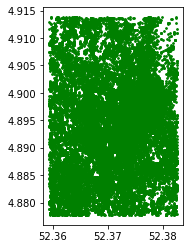

In [5]:
tweetsGDF = gpd.GeoDataFrame(df, geometry=geometry)
tweetsGDF.crs = {'init': 'epsg:4289'}
tweetsGDF.plot(color='green', markersize=3)
print(type(tweetsGDF), len(tweetsGDF))
#tweetsGDF.head()

Reading Shapefiles created and processed in QGIS

In [6]:
tweetscount = gpd.read_file('./gisdata/tweetscount.shp')
Pos_Tweets = gpd.read_file('./gisdata/Positive_Tweets.shp')
Neg_Tweets = gpd.read_file('./gisdata/Negative_Tweets.shp')
Landuse = gpd.read_file('./gisdata/LandUse17.shp')

Amsterdam Land use plot, from Amstedam Open Data

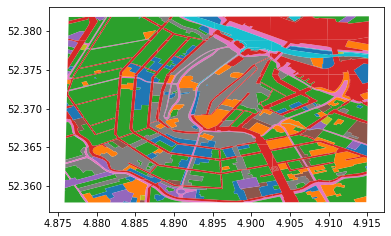

In [7]:
fig, ax = plt.subplots(1, 1)
Landuse.plot(column='CBScode2_1', ax=ax, legend=False)

Tweets by grid, similar to the QGIS one. With Quantiles as dividing scheme

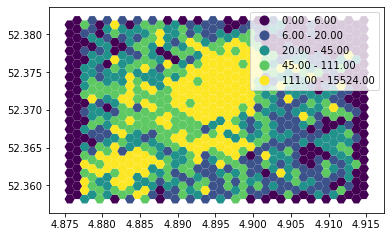

In [8]:
fig, ax = plt.subplots(1, 1)
tweetscount.plot(column='NUMPOINTS', ax=ax, legend=True, scheme='quantiles')

Amsterdam Map in Folium

In [10]:
AmsterdamCoordinates = [52.37, 4.899431]

In [11]:
AmsterdamMap = folium.Map(AmsterdamCoordinates, zoom_start=14, control_scale=True)
#AmsterdamMap.choropleth(tweetscount, name='Tweets count hexagon')
#AmsterdamMap.choropleth(tweetsGDF[tweetsGDF['Analysis'] == 'Negative'], name='Building construction years')
#AmsterdamMap.choropleth(Pos_Tweets, name='Positive Tweets')
#AmsterdamMap.choropleth(Neg_Tweets, name='Negative Tweets')
folium.Choropleth(Landuse,name='Land Uses').add_to(AmsterdamMap)

# show map types using layer control
# add tiles to map
folium.raster_layers.TileLayer('Open Street Map').add_to(AmsterdamMap)
folium.raster_layers.TileLayer('Stamen Terrain').add_to(AmsterdamMap)
folium.raster_layers.TileLayer('Stamen Toner').add_to(AmsterdamMap)
folium.raster_layers.TileLayer('Stamen Watercolor').add_to(AmsterdamMap)
folium.raster_layers.TileLayer('CartoDB Positron').add_to(AmsterdamMap)
folium.raster_layers.TileLayer('CartoDB Dark_Matter').add_to(AmsterdamMap)

# add layer control to show different maps
folium.LayerControl().add_to(AmsterdamMap)
minimap = MiniMap(toggle_display=True)
minimap.add_to(AmsterdamMap)

#campusMap.save('./output/campusMap.html')
AmsterdamMap

C:\Users\Gerard\Anaconda3\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


Reading More data preprocessed in QGIS. Maps with this data may take some time.
Also more plots from this data.

In [ ]:
Pos_Outside = gpd.read_file('./gisdata/Positive_Twt_outside.shp')
Pos_Inside = gpd.read_file('./gisdata/Positive_Twt_inBuildings.shp')
Neg_Outside = gpd.read_file('./gisdata/Negative_Twt_outside.shp')
Neg_Inside = gpd.read_file('./gisdata/Negative_Twt_inBuildings.shp')

In [111]:
Positive_Tweets = gpd.read_file('./gisdata/Positive_Tweets.shp')
Negative_Tweets = gpd.read_file('./gisdata/Negative_Tweets.shp')

In [112]:
#Neg_Inside.head()
weathertypes = ['Temperatur', 'Sunny', 'TempVariat', 'Pressure', 'Humidity', 'Rainy', 'Snow', 'Thundersto']
for i in weathertypes:
    print('Negative Inside', Neg_Inside[i].value_counts())
    print('Positive Inside', Pos_Inside[i].value_counts())
    print('Negative Outside', Neg_Outside[i].value_counts())
    print('Positive Outside', Pos_Outside[i].value_counts())

"\nfor i in weathertypes:\n    print('Negative Inside', Neg_Inside[i].value_counts())\n    print('Positive Inside', Pos_Inside[i].value_counts())\n    print('Negative Outside', Neg_Outside[i].value_counts())\n    print('Positive Outside', Pos_Outside[i].value_counts())\n    "

C:\Users\Gerard\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


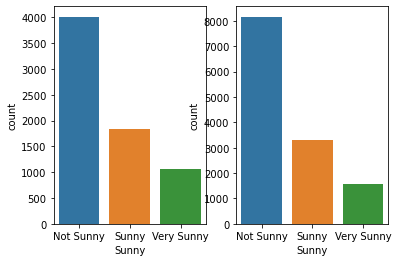

In [79]:
fig, ax =plt.subplots(1,2)
sns.countplot(Neg_Inside['Sunny'], ax=ax[0])
sns.countplot(Neg_Outside['Sunny'], ax=ax[1])
fig.show()

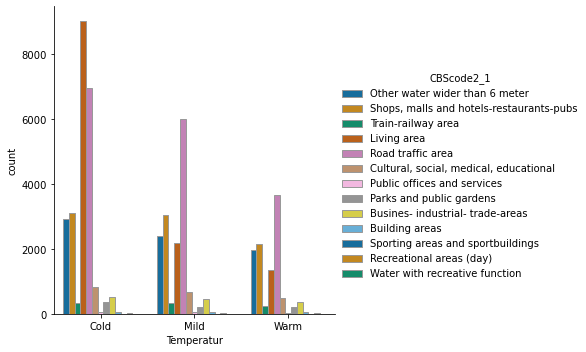

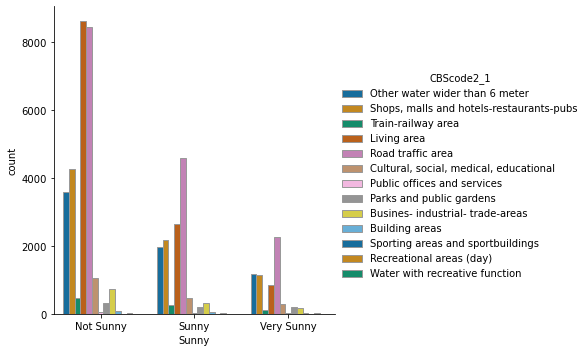

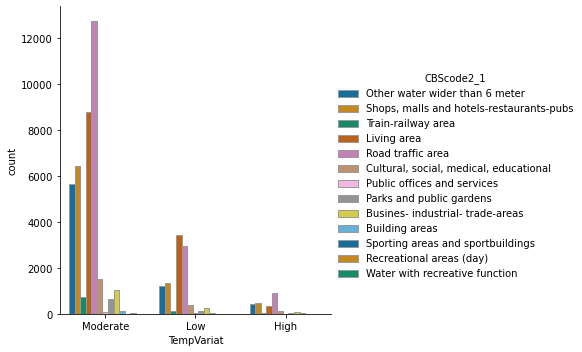

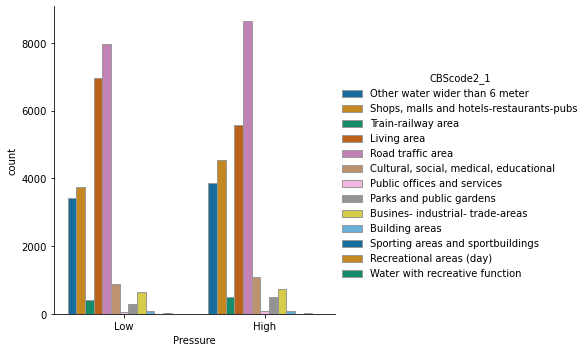

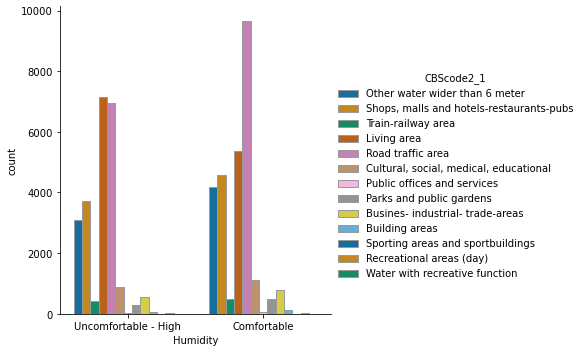

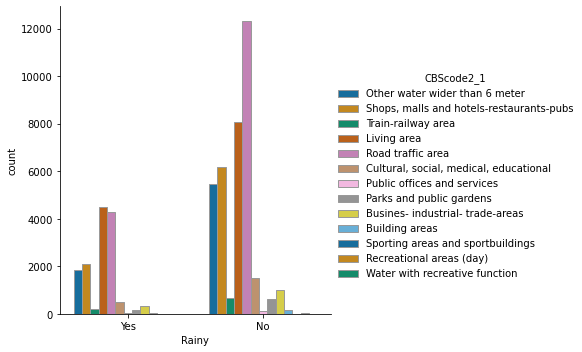

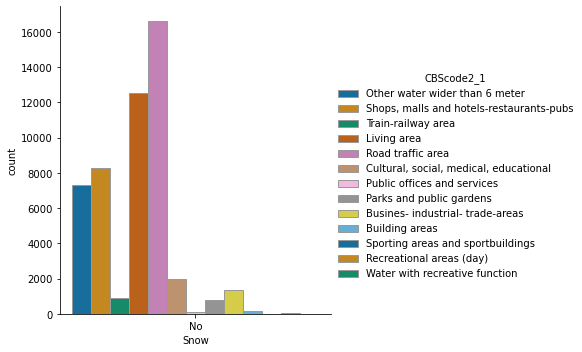

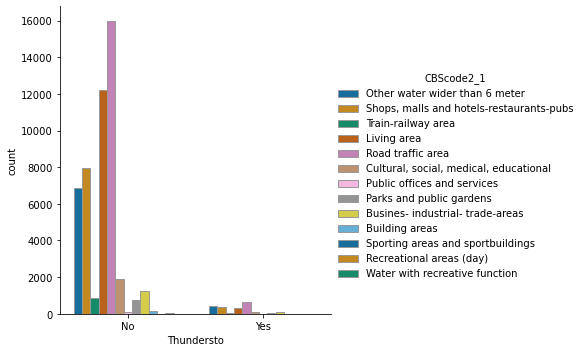

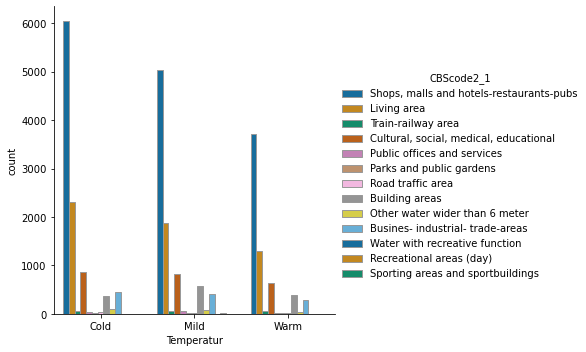

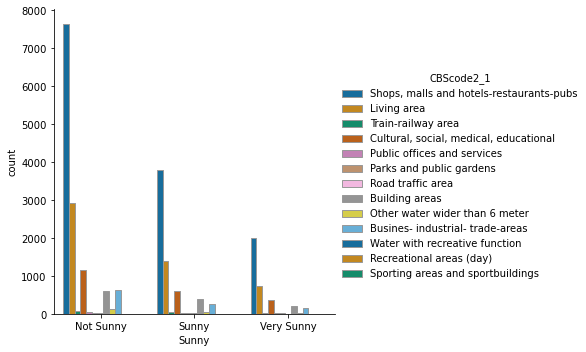

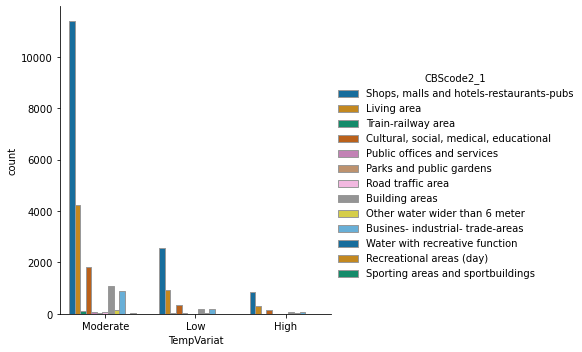

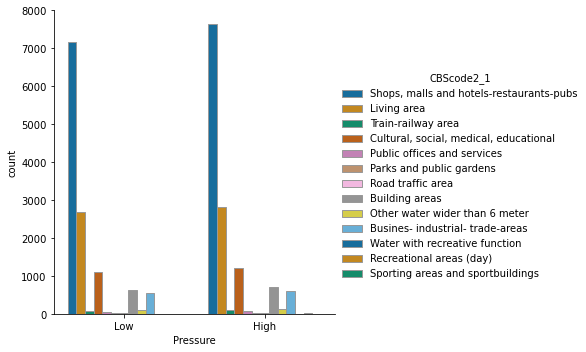

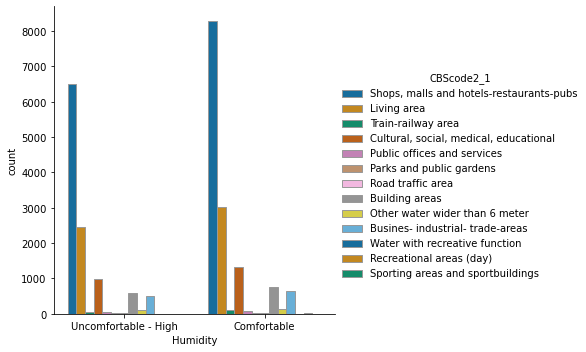

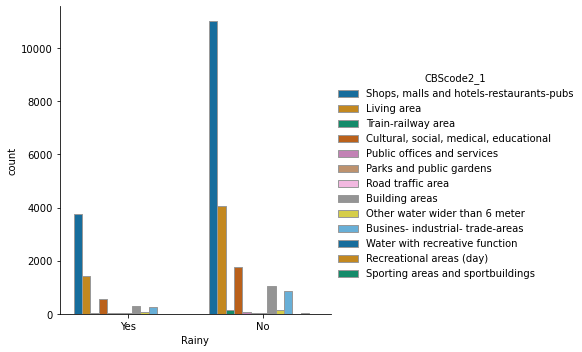

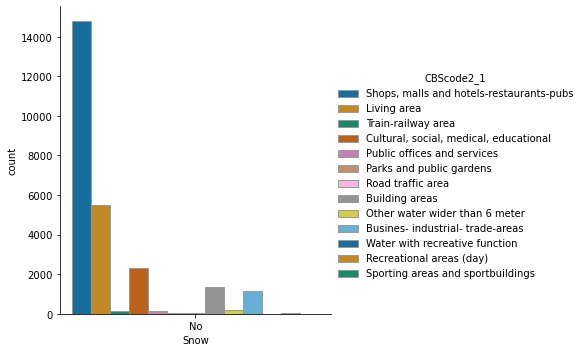

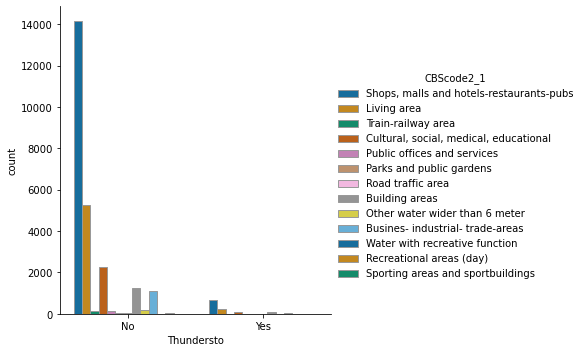

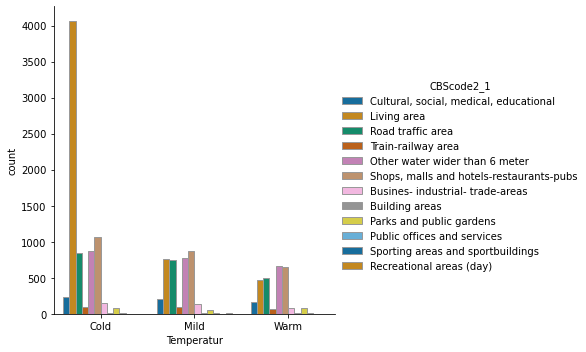

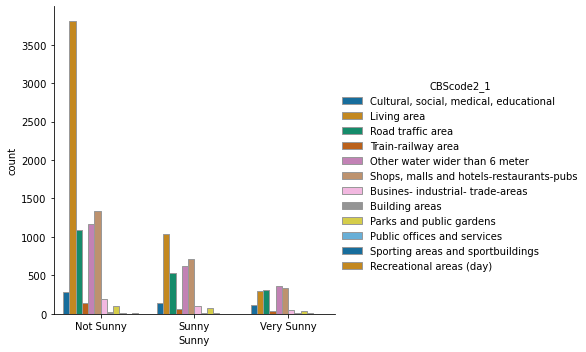

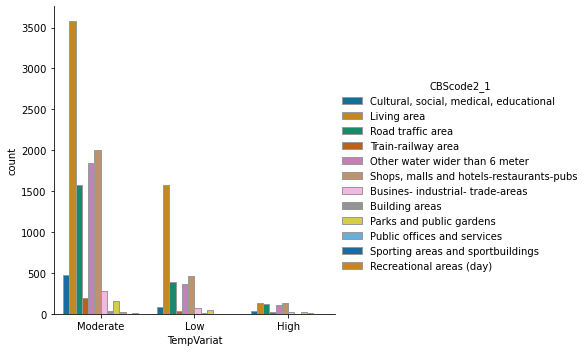

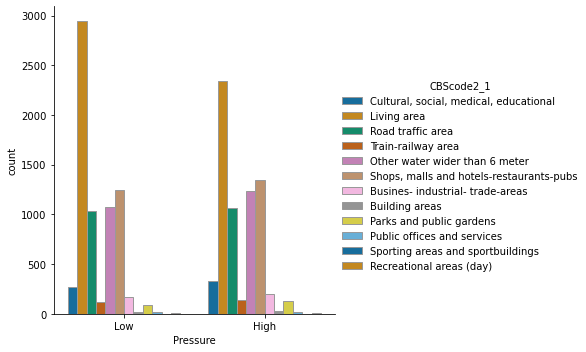

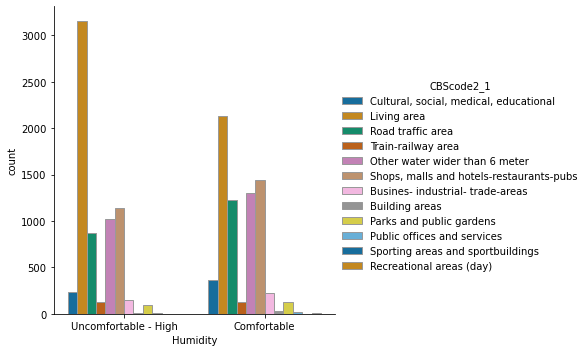

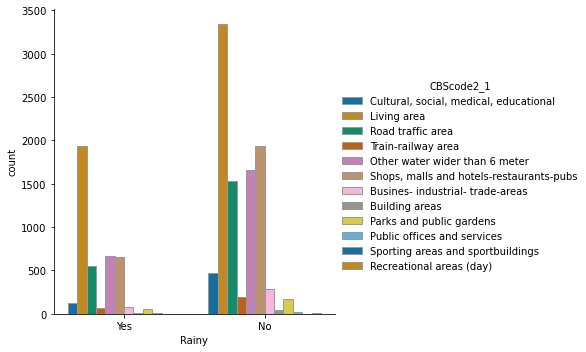

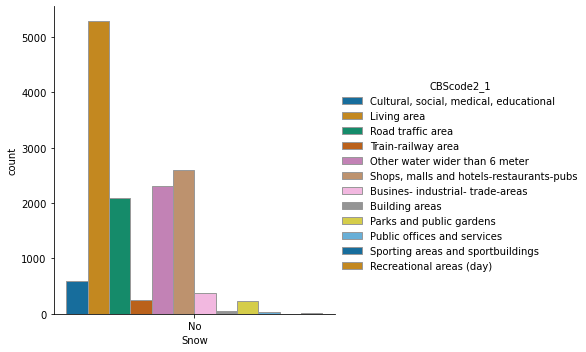

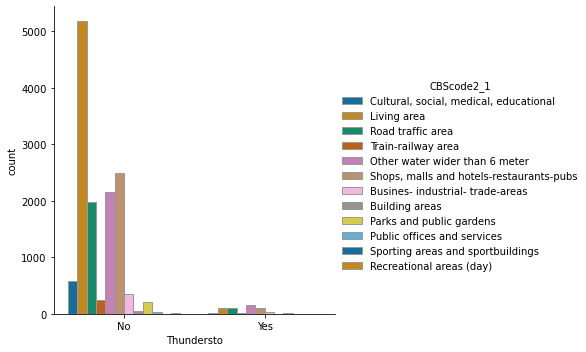

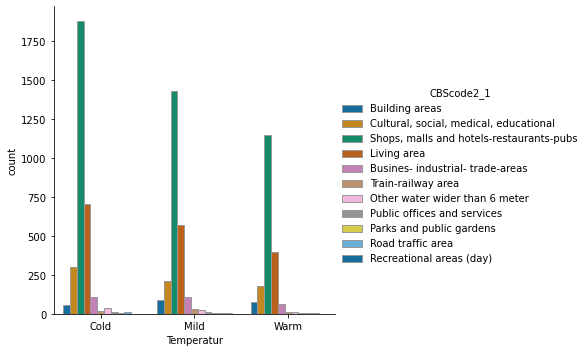

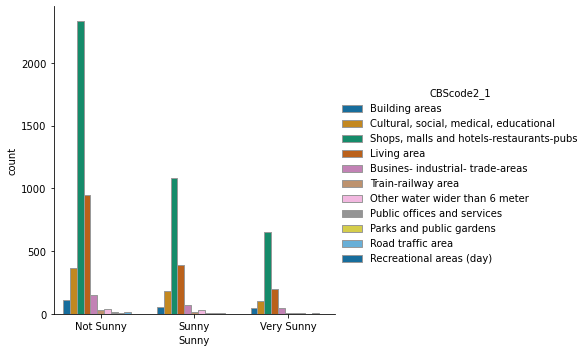

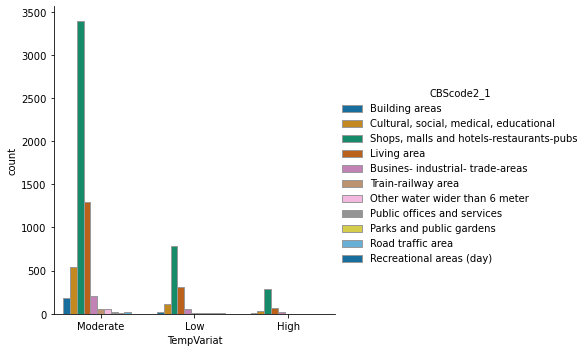

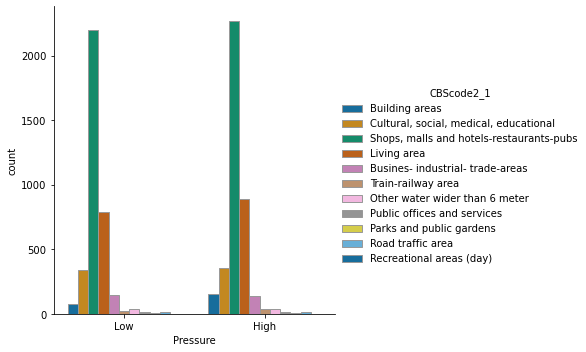

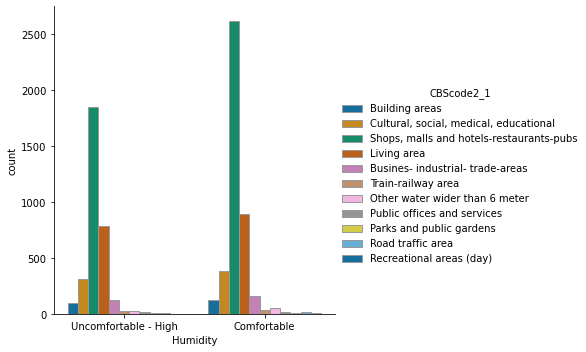

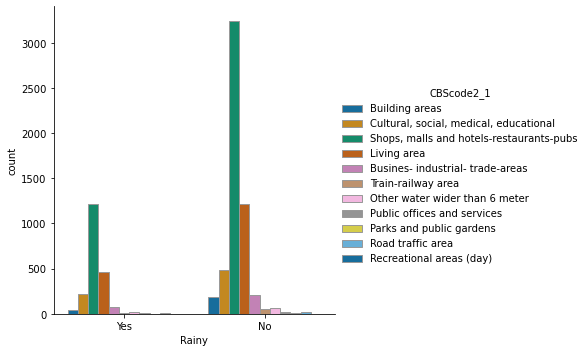

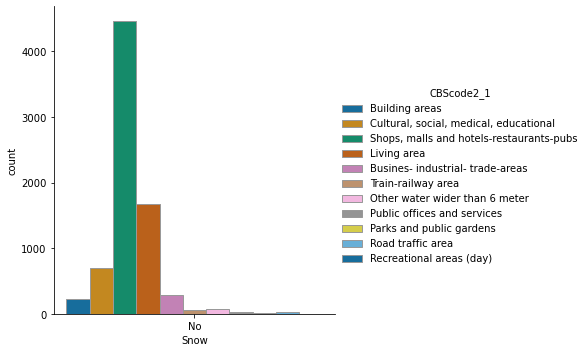

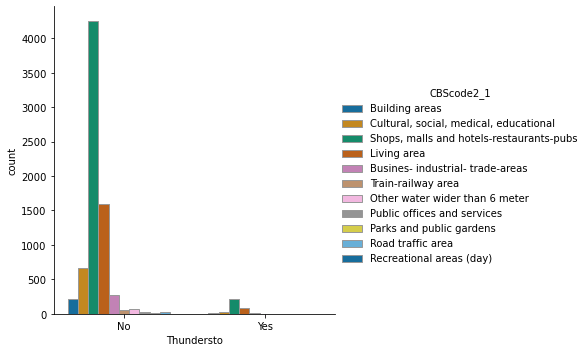

In [110]:
datasets = [Pos_Outside, Pos_Inside, Neg_Outside, Neg_Inside]
datasetsstr = ['Pos_Outside', 'Pos_Inside', 'Neg_Outside', 'Neg_Inside']
for i, k in zip(datasets, datasetsstr): 
    for j in weathertypes:
        name = k + '_' + j + '.png'
        saveplot = sns.catplot(x=j, hue="CBScode2_1", kind="count",
                    palette="colorblind", edgecolor=".6",
                    data=i)
        saveplot.savefig(name)

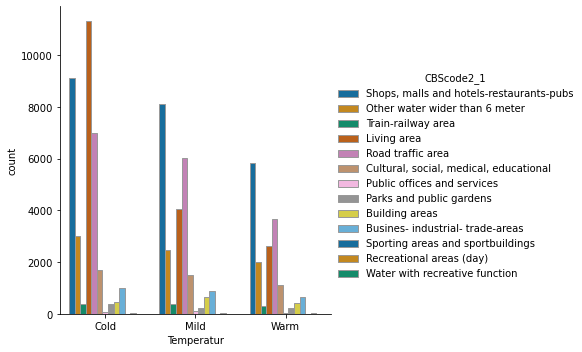

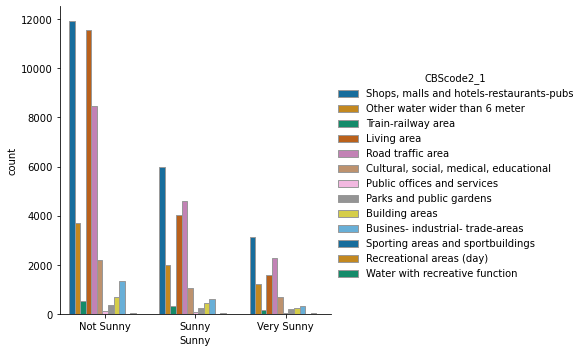

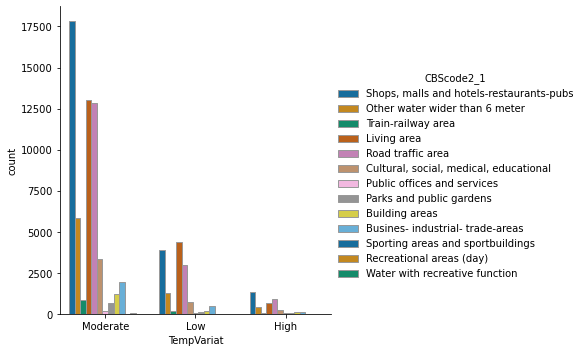

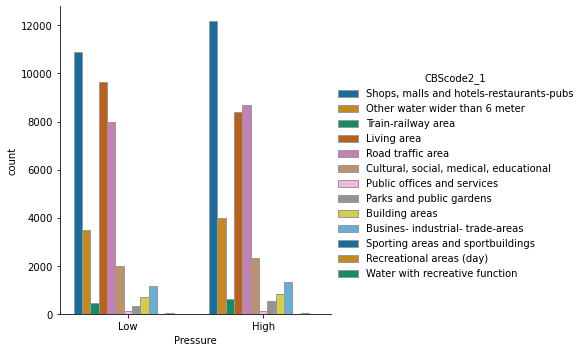

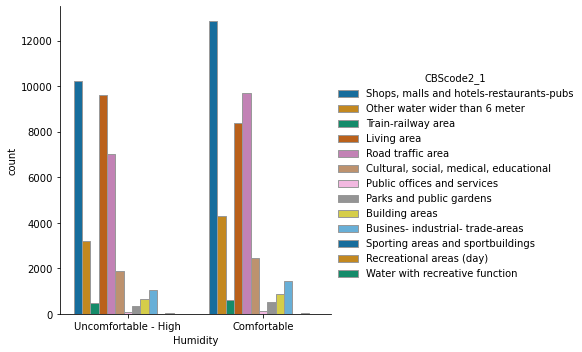

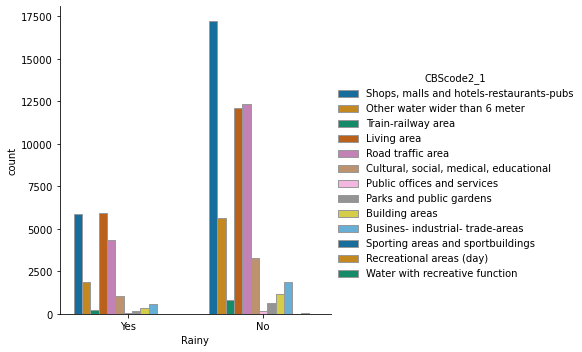

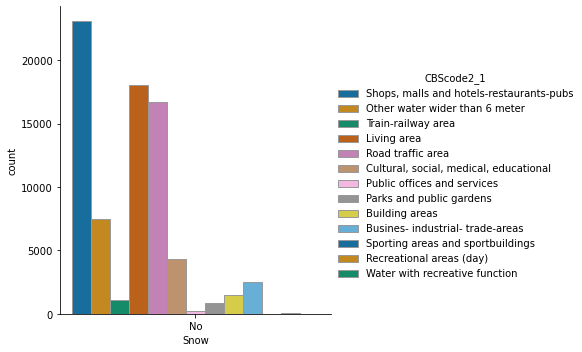

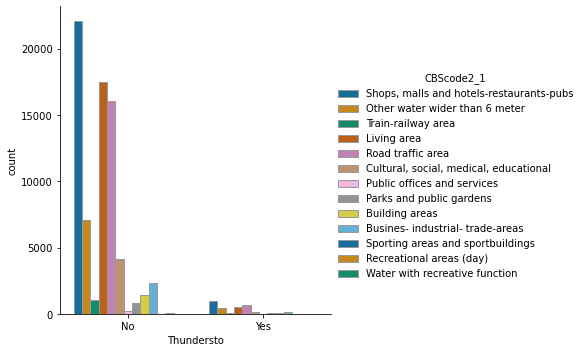

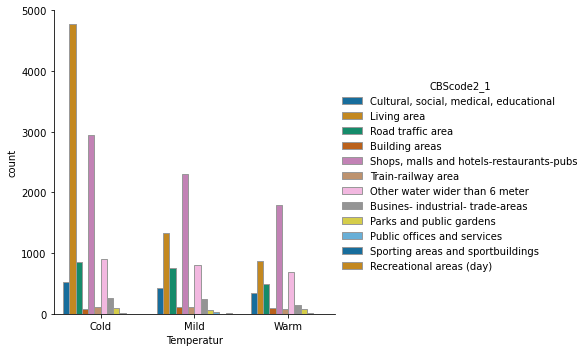

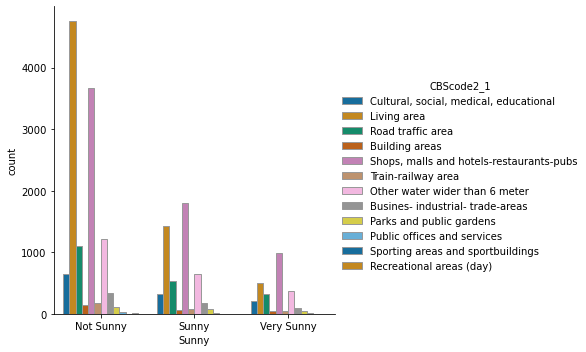

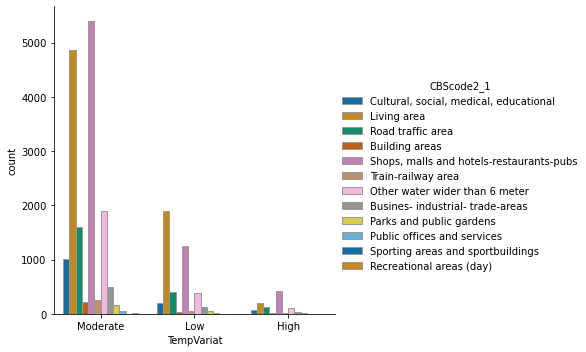

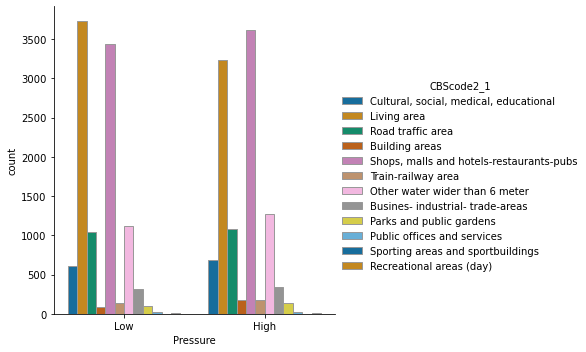

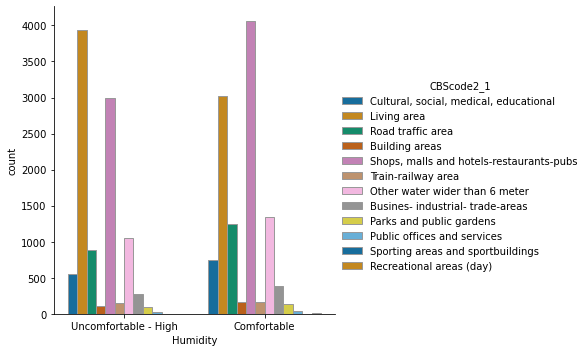

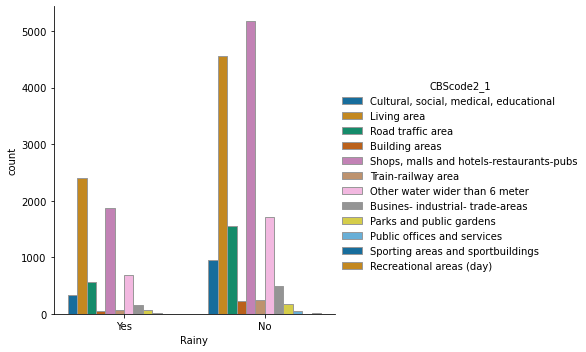

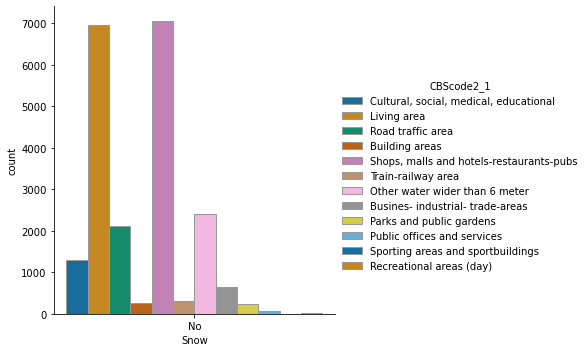

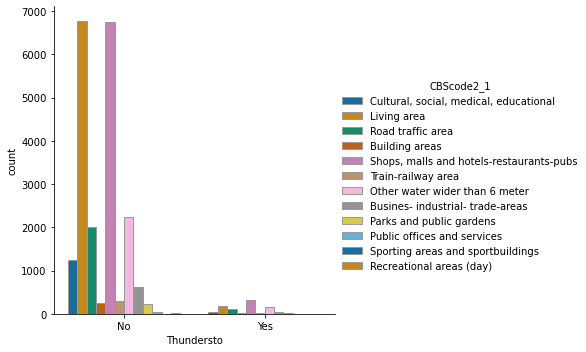

In [113]:
datasets2 = [Positive_Tweets, Negative_Tweets]
datasetsstr2 = ['Positive_Tweets', 'Negative_Tweets']
for i, k in zip(datasets2, datasetsstr2): 
    for j in weathertypes:
        name = k + '_' + j + '.png'
        saveplot = sns.catplot(x=j, hue="CBScode2_1", kind="count",
                    palette="colorblind", edgecolor=".6",
                    data=i)
        saveplot.savefig(name)